In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Ładowanie danych

Loading MNIST database...
MNIST dataset loaded.


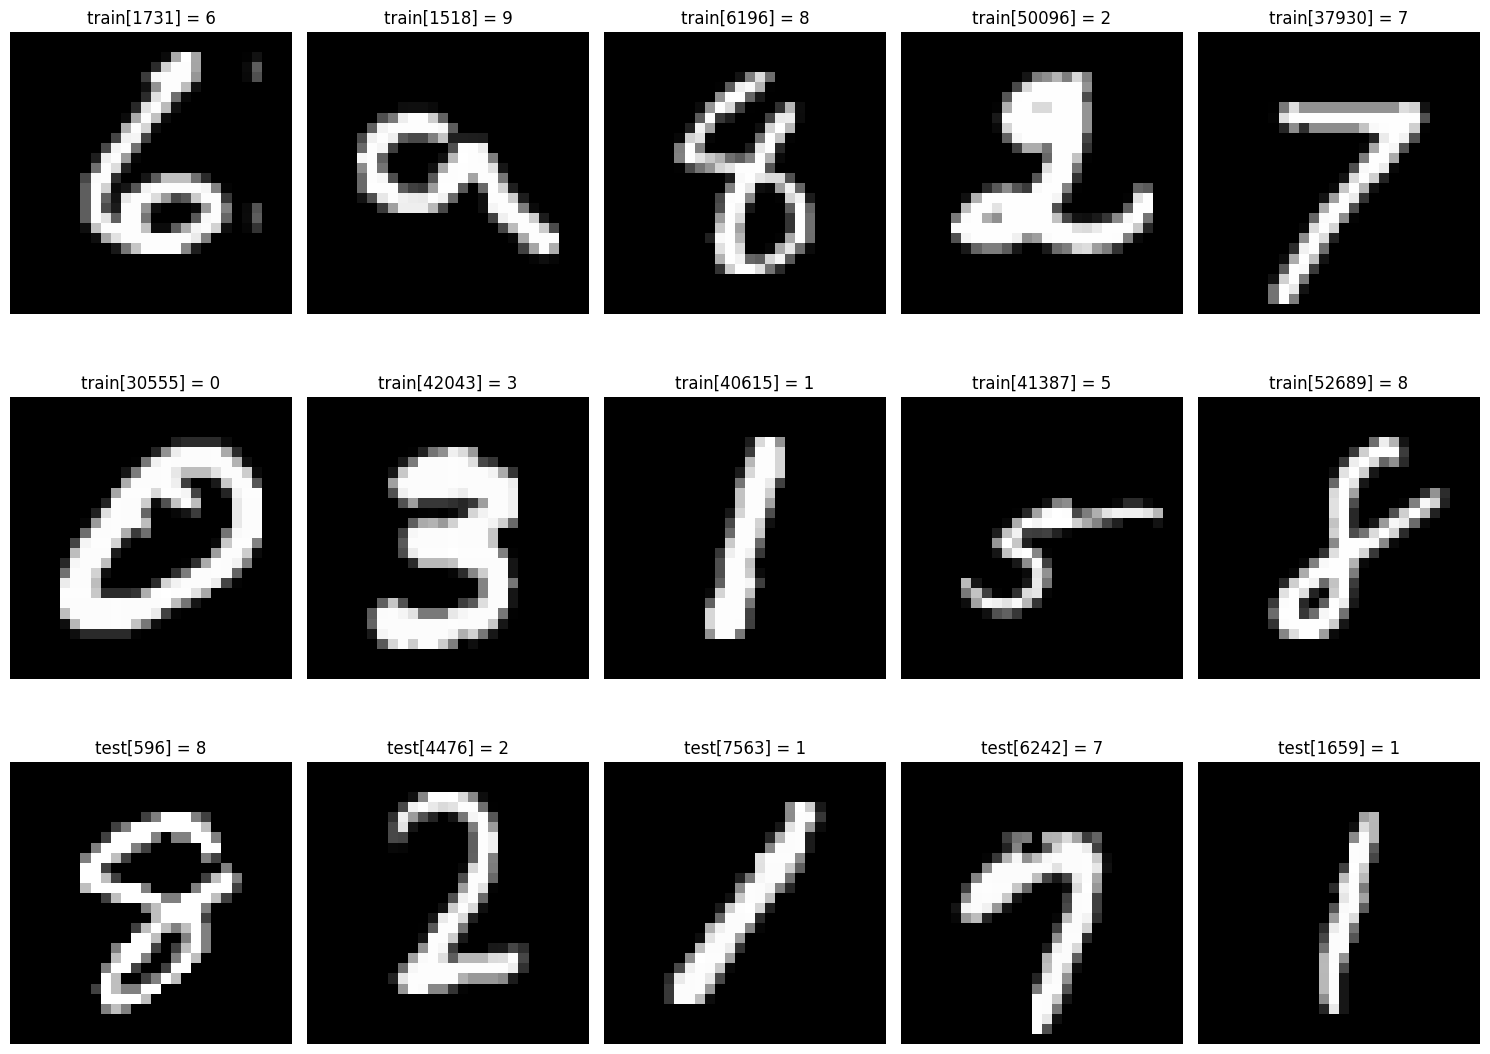

In [7]:
import struct
from array import array
import random

class MnistDataloader(object):
    def __init__(self, train_img_path, train_label_path, test_img_path, test_label_path):
        self.train_img_path = train_img_path
        self.train_label_path = train_label_path
        self.test_img_path = test_img_path
        self.test_label_path = test_label_path

    def read_img_labels(self, img_path, label_path):
        # Loading labels
        with open(label_path, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(f'Magic number mismatch (labels), expected 2049, got {magic}')
            labels = array("B", file.read())

        # Loading images
        with open(img_path, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(f'Magic number mismatch (images), expected 2051, got {magic}')
            image_data = array("B", file.read())

        images = []
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images.append(img)

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_img_labels(self.train_img_path, self.train_label_path)
        x_test, y_test = self.read_img_labels(self.test_img_path, self.test_label_path)
        return (x_train, y_train), (x_test, y_test)

# File paths
train_img_path = './data/train-images.idx3-ubyte'
train_label_path = './data/train-labels.idx1-ubyte'
test_img_path = './data/t10k-images.idx3-ubyte'
test_label_path = './data/t10k-labels.idx1-ubyte'

# Loading data
print('Loading MNIST database...')
dataloader = MnistDataloader(train_img_path, train_label_path, test_img_path, test_label_path)
(x_train, y_train), (x_test, y_test) = dataloader.load_data()
print('MNIST dataset loaded.')

# Showing images
def show_images(images, title_text):
    cols = 5
    rows = int(len(images) / cols) + 1
    plt.figure(figsize=(15, 15))
    for idx, (image, title) in enumerate(zip(images, title_text), start=1):
        plt.subplot(rows, cols, idx)
        plt.imshow(image, cmap=plt.cm.gray)
        if title:
            plt.title(title, fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Randomizing images to show
random_images = []
for _ in range(10):
    r = random.randint(0, len(x_train) - 1)
    random_images.append((x_train[r], f'train[{r}] = {y_train[r]}'))
for _ in range(5):
    r = random.randint(0, len(x_test) - 1)
    random_images.append((x_test[r], f'test[{r}] = {y_test[r]}'))

show_images([x[0] for x in random_images], [x[1] for x in random_images])
